In [8]:
import requests

api_key = "cd4049a3-75bc-4326-82ab-71c05ad80391"
search_term = "America"
page_size = 150
start_page = 1  # Start from page 1

# Construct the URL
search_url = f"https://www.biodiversitylibrary.org/api3?op=PublicationSearch&searchterm={search_term}&searchtype=F&page={start_page}&pageSize={page_size}&format=json&apikey={api_key}"

try:
    # Make the request
    response = requests.get(search_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Try to decode JSON
        try:
            data = response.json()

            # Check if there are any Titles retrieved
            titles = data.get('Result', [])
            print(f"{len(titles)} Titles retrieved:")

            # Print TitleIDs
            for title in titles:
                title_id = title.get('TitleID')
                print(f"TitleID: {title_id}")

        except ValueError as e:
            print("Error decoding JSON:", e)
            print("Response content:", response.text)
    else:
        print(f"Error: {response.status_code}")
        print("Response content:", response.text)

except requests.RequestException as e:
    print("Request error:", e)


150 Titles retrieved:
TitleID: 165590
TitleID: 16609
TitleID: 83718
TitleID: 128830
TitleID: 126065
TitleID: 61843
TitleID: 138445
TitleID: 131118
TitleID: 165590
TitleID: 204056
TitleID: 131118
TitleID: 190243
TitleID: 138445
TitleID: 82383
TitleID: 77733
TitleID: 142865
TitleID: 81367
TitleID: 6139
TitleID: 54513
TitleID: 138876
TitleID: 144661
TitleID: 132894
TitleID: 78087
TitleID: 139886
TitleID: 65016
TitleID: 101517
TitleID: 6139
TitleID: 22390
TitleID: 34046
TitleID: 155792
TitleID: 101517
TitleID: 195064
TitleID: 160985
TitleID: 160983
TitleID: 165601
TitleID: 16609
TitleID: 63687
TitleID: 63687
TitleID: 78681
TitleID: 54513
TitleID: 77852
TitleID: 77947
TitleID: 156432
TitleID: 82383
TitleID: 156432
TitleID: 156432
TitleID: 156432
TitleID: 156432
TitleID: 156432
TitleID: 156432
TitleID: 156432
TitleID: 96801
TitleID: 83679
TitleID: 149005
TitleID: 61995
TitleID: 156432
TitleID: 156432
TitleID: 110488
TitleID: 50472
TitleID: 82392
TitleID: 30246
TitleID: 156432
TitleID: 84040


In [9]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

api_key = "apikey"
search_term = "Plants"
page_size = 200  # Increase page_size to retrieve more articles in each request
start_page = 1

# Lists to store data
titles_list = []
item_ids_list = []
material_types_list = []
publisher_places_list = []
publication_dates_list = []

try:
    # Construct the URL for the first page
    search_url = f"https://www.biodiversitylibrary.org/api3?op=PublicationSearch&searchterm={search_term}&apikey={api_key}&page={start_page}&pageSize={page_size}"

    # Make the request
    response = requests.get(search_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the XML response
        root = ET.fromstring(response.text)

        # Extract information from the XML
        publications = root.findall(".//Publication")
        for publication in publications:
            title = publication.find(".//Title")
            title_name = title.text if title is not None else "N/A"
            titles_list.append(title_name)

            item_id = publication.find(".//ItemID")
            item_id_value = item_id.text if item_id is not None else "N/A"
            item_ids_list.append(item_id_value)

            material_type = publication.find(".//MaterialType")
            material_type_value = material_type.text if material_type is not None else "N/A"
            material_types_list.append(material_type_value)

            publisher_place = publication.find(".//PublisherPlace")
            publisher_place_value = publisher_place.text if publisher_place is not None else "N/A"
            publisher_places_list.append(publisher_place_value)

            publication_date = publication.find(".//PublicationDate")
            publication_date_value = publication_date.text if publication_date is not None else "N/A"
            publication_dates_list.append(publication_date_value)

        # Create a DataFrame
        df = pd.DataFrame({
            'Title': titles_list,
            'ItemID': item_ids_list,
            'MaterialType': material_types_list,
            'PublisherPlace': publisher_places_list,
            'PublicationDate': publication_dates_list
        })

        # Display the DataFrame
        print(df)

    else:
        print(f"Error: {response.status_code}")
        print("Response content:", response.text)

except requests.RequestException as e:
    print("Request error:", e)


                                                 Title  ItemID  \
0    Theophrasti De Historia plantarum liber primus...  127153   
1                                            Plantsman   63375   
2                                            Plantsman   72213   
3                                            Plantsman   63527   
4                          Rock plants & alpine plants  240348   
..                                                 ...     ...   
195                                     Florida Plants     N/A   
196                                   Vegetable plants  216741   
197                               Insectivorous plants  219263   
198                                   Argentine Plants     N/A   
199                                       Hardy plants  231466   

           MaterialType                                     PublisherPlace  \
0    Published material                                 Impressum Taruisii   
1    Published material  Durham NH  New Hampshire P

In [10]:
df

,Title,ItemID,MaterialType,PublisherPlace,PublicationDate
0,Theophrasti De Historia plantarum liber primus...,127153,Published material,Impressum Taruisii,1483
1,Plantsman,63375,Published material,Durham NH New Hampshire Plant Growers' Associ...,1997
2,Plantsman,72213,Published material,Durham NH New Hampshire Plant Growers' Associ...,1993
3,Plantsman,63527,Published material,Durham NH New Hampshire Plant Growers' Associ...,1991
4,Rock plants & alpine plants,240348,Published material,Bergenfield NJ,1928
...,...,...,...,...,...
195,Florida Plants,N/A,N/A,N/A,N/A
196,Vegetable plants,216741,Published material,Summerville SC,1921
197,Insectivorous plants,219263,Published material,New York,1884
198,Argentine Plants,N/A,N/A,N/A,N/A


/var/folders/kf/7cwkrxw52m59mx5w2s69swp40000gp/T/ipykernel_4878/1551258325.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PublicationYear'] = df_filtered['PublicationDate'].str.extract(r'(\d{4})')
/var/folders/kf/7cwkrxw52m59mx5w2s69swp40000gp/T/ipykernel_4878/1551258325.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PublicationYear'] = df_filtered['PublicationYear'].astype(float)


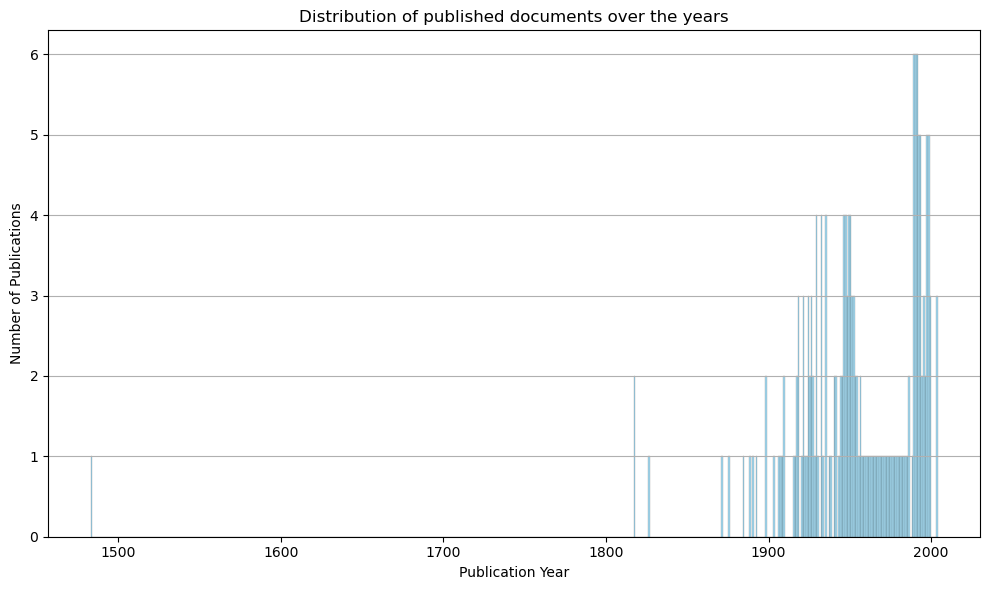

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with a 'PublicationDate' column
# Create a sample DataFrame for demonstration purposes


# Convert 'N/A' to NaN
df['PublicationDate'] = df['PublicationDate'].replace('N/A', np.nan)

# Drop rows with NaN in 'PublicationDate' column for histogram plotting
df_filtered = df.dropna(subset=['PublicationDate'])

# Extract only the years from the 'PublicationDate' column
df_filtered['PublicationYear'] = df_filtered['PublicationDate'].str.extract(r'(\d{4})')

# Convert the 'PublicationYear' column of the filtered dataframe to integer type
df_filtered['PublicationYear'] = df_filtered['PublicationYear'].astype(float)

# Plot the histogram with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='PublicationYear', bins=range(int(df_filtered['PublicationYear'].min()), int(df_filtered['PublicationYear'].max()) + 2), kde=False, color='skyblue')

plt.title('Distribution of published documents over the years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [6]:
import sys
!{sys.executable} -m pip install geopy # this is a way we could circumvent the issue


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 754.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.0 MB/s eta 0:00:0000:01:00:01


In [12]:

import pycountry
from geopy.geocoders import Nominatim
import seaborn as sns
import matplotlib.pyplot as plt

# Function to check if a string is a valid country name
def is_country(name):
    try:
        pycountry.countries.lookup(name)
        return True
    except LookupError:
        return False

# Function to get country from city using reverse geocoding
def get_country_from_city(city):
    geolocator = Nominatim(user_agent="your_app_name")  # Replace "your_app_name" with your actual app name
    location = geolocator.geocode(city)
    if location and location.raw.get('address'):
        country = location.raw['address'].get('country')
        if country and is_country(country):
            return country
    return None

# Explode and reset index
exploded_df = df['PublisherPlace'].str.split('[;,.]').explode().reset_index()
exploded_df.columns = ['original_index', 'City']
exploded_df['City'] = exploded_df['City'].str.strip()

# Filter the valid cities
valid_cities_df = exploded_df[exploded_df['City'].apply(lambda x: get_country_from_city(x) is not None)]

# Get the countries
valid_cities_df['Country'] = valid_cities_df['City'].apply(get_country_from_city)

# Count the occurrences and get the top countries
top_countries = valid_cities_df['Country'].value_counts()

# Check if top_countries is not empty before plotting
if not top_countries.empty:
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_countries.head(10).index, y=top_countries.head(10).values, palette='viridis')
    plt.title('Top Countries by Paper Count')
    plt.xlabel('Country')
    plt.ylabel('Number of Papers')
    plt.xticks(rotation=45, ha="right")  # Adjust rotation for better readability
    plt.tight_layout()
    plt.show()
else:
    print("No valid countries found.")


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=N%2FA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [16]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

api_key = "apikey"
search_term = "Plants"
page_size = 5 # Increase page_size to retrieve more articles in each request
start_page = 1

# Lists to store data
titles_list = []
item_ids_list = []
material_types_list = []
publisher_places_list = []
publication_dates_list = []
texts_list = []

try:
    # Construct the URL for the first page
    search_url = f"https://www.biodiversitylibrary.org/api3?op=PublicationSearch&searchterm={search_term}&apikey={api_key}&page={start_page}&pageSize={page_size}"

    # Make the request
    response = requests.get(search_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the XML response
        root = ET.fromstring(response.text)

        # Extract information from the XML
        publications = root.findall(".//Publication")
        for publication in publications:
            title = publication.find(".//Title")
            title_name = title.text if title is not None else "N/A"
            titles_list.append(title_name)

            item_id = publication.find(".//ItemID")
            item_id_value = item_id.text if item_id is not None else "N/A"
            item_ids_list.append(item_id_value)

            material_type = publication.find(".//MaterialType")
            material_type_value = material_type.text if material_type is not None else "N/A"
            material_types_list.append(material_type_value)

            publisher_place = publication.find(".//PublisherPlace")
            publisher_place_value = publisher_place.text if publisher_place is not None else "N/A"
            publisher_places_list.append(publisher_place_value)

            publication_date = publication.find(".//PublicationDate")
            publication_date_value = publication_date.text if publication_date is not None else "N/A"
            publication_dates_list.append(publication_date_value)

            # Get the OCR text for the item
            item_url = f"https://www.biodiversitylibrary.org/api3?op=ItemGet&itemid={item_id_value}&pages=t&ocr=t&parts=f&apikey={api_key}"
            item_response = requests.get(item_url)
            if item_response.status_code == 200:
               # Check if the response is not empty and is well-formed XML
                try:
                    item_root = ET.fromstring(item_response.text)
                    ocr_text = item_root.find(".//Page/OCRText")
                    ocr_text_value = ocr_text.text if ocr_text is not None else "N/A"
                except ET.ParseError:
                    print(f"Error parsing XML for ItemID {item_id_value}")
                    ocr_text_value = "N/A"  # Add a placeholder value
                texts_list.append(ocr_text_value)




        # Create a DataFrame
        df = pd.DataFrame({
            'Title': titles_list,
            'ItemID': item_ids_list,
            'MaterialType': material_types_list,
            'PublisherPlace': publisher_places_list,
            'PublicationDate': publication_dates_list,
            'Text': texts_list
        })

        # Display the DataFrame
        print(df)

    else:
        print(f"Error: {response.status_code}")
        print("Response content:", response.text)

except requests.RequestException as e:
    print("Request error:", e)


Error parsing XML for ItemID 127153
Error parsing XML for ItemID 63375
Error parsing XML for ItemID 72213
Error parsing XML for ItemID 63527
Error parsing XML for ItemID 240348
                                               Title  ItemID  \
0  Theophrasti De Historia plantarum liber primus...  127153   
1                                          Plantsman   63375   
2                                          Plantsman   72213   
3                                          Plantsman   63527   
4                        Rock plants & alpine plants  240348   

         MaterialType                                     PublisherPlace  \
0  Published material                                 Impressum Taruisii   
1  Published material  Durham NH  New Hampshire Plant Growers' Associ...   
2  Published material  Durham NH  New Hampshire Plant Growers' Associ...   
3  Published material  Durham NH  New Hampshire Plant Growers' Associ...   
4  Published material                                     

In [17]:
df

,Title,ItemID,MaterialType,PublisherPlace,PublicationDate,Text
0,Theophrasti De Historia plantarum liber primus...,127153,Published material,Impressum Taruisii,1483,N/A
1,Plantsman,63375,Published material,Durham NH New Hampshire Plant Growers' Associ...,1997,N/A
2,Plantsman,72213,Published material,Durham NH New Hampshire Plant Growers' Associ...,1993,N/A
3,Plantsman,63527,Published material,Durham NH New Hampshire Plant Growers' Associ...,1991,N/A
4,Rock plants & alpine plants,240348,Published material,Bergenfield NJ,1928,N/A


In [21]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

api_key = "cd4049a3-75bc-4326-82ab-71c05ad80391"
search_term = "Plants"
page_size = 200 # Increase page_size to retrieve more articles in each request
start_page = 1

# Lists to store data
titles_list = []
item_ids_list = []
material_types_list = []
publisher_places_list = []
publication_dates_list = []
texts_list = []

try:
    # Construct the URL for the first page
    search_url = f"https://www.biodiversitylibrary.org/api3?op=PublicationSearch&searchterm={search_term}&apikey={api_key}&page={start_page}&pageSize={page_size}"

    # Make the request
    response = requests.get(search_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the XML response
        root = ET.fromstring(response.text)

        # Extract information from the XML
        publications = root.findall(".//Publication")
        for publication in publications:
            title = publication.find(".//Title")
            title_name = title.text if title is not None else "N/A"
            titles_list.append(title_name)

            item_id = publication.find(".//ItemID")
            item_id_value = item_id.text if item_id is not None else "N/A"
            item_ids_list.append(item_id_value)

            material_type = publication.find(".//MaterialType")
            material_type_value = material_type.text if material_type is not None else "N/A"
            material_types_list.append(material_type_value)

            publisher_place = publication.find(".//PublisherPlace")
            publisher_place_value = publisher_place.text if publisher_place is not None else "N/A"
            publisher_places_list.append(publisher_place_value)

            publication_date = publication.find(".//PublicationDate")
            publication_date_value = publication_date.text if publication_date is not None else "N/A"
            publication_dates_list.append(publication_date_value)

            # Get the OCR text for the item
            item_url = f"https://www.biodiversitylibrary.org/api3?op=ItemGet&itemid={item_id_value}&pages=t&ocr=t&parts=f&apikey={api_key}"
            item_response = requests.get(item_url)
            if item_response.status_code == 200:
                # Check if the response is not empty and is well-formed XML
                try:
                    item_root = ET.fromstring(item_response.text)
                    pages = item_root.findall(".//Page")
                    ocr_text_value = ""
                    for page in pages:
                        ocr_text = page.find("OCRText")
                        if ocr_text is not None and ocr_text.text is not None:
                            ocr_text_value += ocr_text.text
                    if ocr_text_value == "":
                        ocr_text_value = "N/A"
                except ET.ParseError:
                    print(f"Error parsing XML for ItemID {item_id_value}. Skipping this ItemID.")
                    continue
                finally:
                    texts_list.append(ocr_text_value)

        # Create a DataFrame
        df = pd.DataFrame({
            'Title': titles_list,
            'ItemID': item_ids_list,
            'MaterialType': material_types_list,
            'PublisherPlace': publisher_places_list,
            'PublicationDate': publication_dates_list,
            'Text': texts_list
        })

        # Display the DataFrame
        print(df)

    else:
        print(f"Error: {response.status_code}")
        print("Response content:", response.text)

except requests.RequestException as e:
    print("Request error:", e)


Error parsing XML for ItemID 127153. Skipping this ItemID.
Error parsing XML for ItemID 63375. Skipping this ItemID.
Error parsing XML for ItemID 72213. Skipping this ItemID.
Error parsing XML for ItemID 63527. Skipping this ItemID.
Error parsing XML for ItemID 240348. Skipping this ItemID.
Error parsing XML for ItemID 245371. Skipping this ItemID.
Error parsing XML for ItemID 72287. Skipping this ItemID.
Error parsing XML for ItemID 72212. Skipping this ItemID.
Error parsing XML for ItemID 63624. Skipping this ItemID.
Error parsing XML for ItemID 243734. Skipping this ItemID.
Error parsing XML for ItemID 301483. Skipping this ItemID.
Error parsing XML for ItemID 307466. Skipping this ItemID.
Error parsing XML for ItemID 304015. Skipping this ItemID.
Error parsing XML for ItemID 238112. Skipping this ItemID.
Error parsing XML for ItemID 238122. Skipping this ItemID.
Error parsing XML for ItemID 238132. Skipping this ItemID.
Error parsing XML for ItemID 238147. Skipping this ItemID.
Err

In [22]:
df

,Title,ItemID,MaterialType,PublisherPlace,PublicationDate,Text
0,Theophrasti De Historia plantarum liber primus...,127153,Published material,Impressum Taruisii,1483,N/A
1,Plantsman,63375,Published material,Durham NH New Hampshire Plant Growers' Associ...,1997,N/A
2,Plantsman,72213,Published material,Durham NH New Hampshire Plant Growers' Associ...,1993,N/A
3,Plantsman,63527,Published material,Durham NH New Hampshire Plant Growers' Associ...,1991,N/A
4,Rock plants & alpine plants,240348,Published material,Bergenfield NJ,1928,N/A
...,...,...,...,...,...,...
195,Florida Plants,N/A,N/A,N/A,N/A,N/A
196,Vegetable plants,216741,Published material,Summerville SC,1921,N/A
197,Insectivorous plants,219263,Published material,New York,1884,N/A
198,Argentine Plants,N/A,N/A,N/A,N/A,N/A


In [1]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

api_key = "cd4049a3-75bc-4326-82ab-71c05ad80391"
search_term = "Plants"
page_size = 200
start_page = 1
total_pages = 5  # Set the total number of pages you want to retrieve

# Lists to store data
titles_list = []
item_ids_list = []
material_types_list = []
publisher_places_list = []
publication_dates_list = []

try:
    for page in range(start_page, start_page + total_pages):
        # Construct the URL for the current page
        search_url = f"https://www.biodiversitylibrary.org/api3?op=PublicationSearch&searchterm={search_term}&apikey={api_key}&page={page}&pageSize={page_size}"

        # Make the request
        response = requests.get(search_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the XML response
            root = ET.fromstring(response.text)

            # Extract information from the XML
            publications = root.findall(".//Publication")
            for publication in publications:
                title = publication.find(".//Title")
                title_name = title.text if title is not None else "N/A"
                titles_list.append(title_name)

                item_id = publication.find(".//ItemID")
                item_id_value = item_id.text if item_id is not None else "N/A"
                item_ids_list.append(item_id_value)

                material_type = publication.find(".//MaterialType")
                material_type_value = material_type.text if material_type is not None else "N/A"
                material_types_list.append(material_type_value)

                publisher_place = publication.find(".//PublisherPlace")
                publisher_place_value = publisher_place.text if publisher_place is not None else "N/A"
                publisher_places_list.append(publisher_place_value)

                publication_date = publication.find(".//PublicationDate")
                publication_date_value = publication_date.text if publication_date is not None else "N/A"
                publication_dates_list.append(publication_date_value)

        else:
            print(f"Error: {response.status_code}")
            print("Response content:", response.text)

except requests.RequestException as e:
    print("Request error:", e)

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles_list,
    'ItemID': item_ids_list,
    'MaterialType': material_types_list,
    'PublisherPlace': publisher_places_list,
    'PublicationDate': publication_dates_list
})

# Display the DataFrame
print(df)


                                                 Title  ItemID  \
0    Theophrasti De Historia plantarum liber primus...  127153   
1                                            Plantsman   63375   
2                                            Plantsman   72213   
3                                            Plantsman   63527   
4                          Rock plants & alpine plants  240348   
..                                                 ...     ...   
995                        Plants from Baja California     N/A   
996                     Seeds, plants, bulbs [catalog]  227784   
997                    Hitchcock's Plants from Ecuador     N/A   
998                            The proteases of plants     N/A   
999                Carnivorous or Insectivorous Plants     N/A   

           MaterialType                                     PublisherPlace  \
0    Published material                                 Impressum Taruisii   
1    Published material  Durham NH  New Hampshire P

In [2]:
df

,Title,ItemID,MaterialType,PublisherPlace,PublicationDate
0,Theophrasti De Historia plantarum liber primus...,127153,Published material,Impressum Taruisii,1483
1,Plantsman,63375,Published material,Durham NH New Hampshire Plant Growers' Associ...,1997
2,Plantsman,72213,Published material,Durham NH New Hampshire Plant Growers' Associ...,1993
3,Plantsman,63527,Published material,Durham NH New Hampshire Plant Growers' Associ...,1991
4,Rock plants & alpine plants,240348,Published material,Bergenfield NJ,1928
...,...,...,...,...,...
995,Plants from Baja California,N/A,N/A,N/A,N/A
996,"Seeds, plants, bulbs [catalog]",227784,Published material,Minneapolis Minn,1924
997,Hitchcock's Plants from Ecuador,N/A,N/A,N/A,N/A
998,The proteases of plants,N/A,N/A,N/A,N/A


In [9]:
#This took between 5 minutes or something close to run. try to find ways to speed up the process
import requests
import xml.etree.ElementTree as ET
import pandas as pd

api_key = "cd4049a3-75bc-4326-82ab-71c05ad80391"
search_term = "Plants"
page_size = 200
start_page = 1
total_pages = 50

# Set to store unique ItemIDs
unique_item_ids = set()

# Lists to store data
titles_list = []
item_ids_list = []
material_types_list = []
publisher_places_list = []
publication_dates_list = []

try:
    for page in range(start_page, start_page + total_pages):
        # Construct the URL for the current page
        search_url = f"https://www.biodiversitylibrary.org/api3?op=PublicationSearch&searchterm={search_term}&apikey={api_key}&page={page}&pageSize={page_size}"

        # Make the request
        response = requests.get(search_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the XML response
            root = ET.fromstring(response.text)

            # Extract information from the XML
            publications = root.findall(".//Publication")
            for publication in publications:
                item_id = publication.find(".//ItemID")
                item_id_value = item_id.text if item_id is not None else "N/A"

                # Check if the item_id is unique before adding to the lists
                if item_id_value not in unique_item_ids:
                    title = publication.find(".//Title")
                    title_name = title.text if title is not None else "N/A"
                    titles_list.append(title_name)

                    item_ids_list.append(item_id_value)

                    material_type = publication.find(".//MaterialType")
                    material_type_value = material_type.text if material_type is not None else "N/A"
                    material_types_list.append(material_type_value)

                    publisher_place = publication.find(".//PublisherPlace")
                    publisher_place_value = publisher_place.text if publisher_place is not None else "N/A"
                    publisher_places_list.append(publisher_place_value)

                    publication_date = publication.find(".//PublicationDate")
                    publication_date_value = publication_date.text if publication_date is not None else "N/A"
                    publication_dates_list.append(publication_date_value)

                    # Add the item_id to the set to track uniqueness
                    unique_item_ids.add(item_id_value)

        else:
            print(f"Error: {response.status_code}")
            print("Response content:", response.text)

except requests.RequestException as e:
    print("Request error:", e)

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles_list,
    'ItemID': item_ids_list,
    'MaterialType': material_types_list,
    'PublisherPlace': publisher_places_list,
    'PublicationDate': publication_dates_list
})

# Display the DataFrame
print(df)


KeyboardInterrupt: 

In [10]:
df

,Title,ItemID,MaterialType,PublisherPlace,PublicationDate
0,Theophrasti De Historia plantarum liber primus...,127153,Published material,Impressum Taruisii,1483
1,Plantsman,63375,Published material,Durham NH New Hampshire Plant Growers' Associ...,1997
2,Plantsman,72213,Published material,Durham NH New Hampshire Plant Growers' Associ...,1993
3,Plantsman,63527,Published material,Durham NH New Hampshire Plant Growers' Associ...,1991
4,Rock plants & alpine plants,240348,Published material,Bergenfield NJ,1928
...,...,...,...,...,...
7614,General catalogue of fruit and ornamental tree...,195716,Published material,Rochester NY,1916
7615,"Fruit, shade and ornamental trees, shrubs, pla...",186327,Published material,Milton Or,1912
7616,"Childs' rare flowers, vegetables, and fruit 1905",152168,Published material,Floral Park NY,1905
7617,Green Pastures Gardens,307343,Published material,Seattle Washington,1950


/var/folders/kf/7cwkrxw52m59mx5w2s69swp40000gp/T/ipykernel_7090/1551258325.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PublicationYear'] = df_filtered['PublicationDate'].str.extract(r'(\d{4})')
/var/folders/kf/7cwkrxw52m59mx5w2s69swp40000gp/T/ipykernel_7090/1551258325.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PublicationYear'] = df_filtered['PublicationYear'].astype(float)


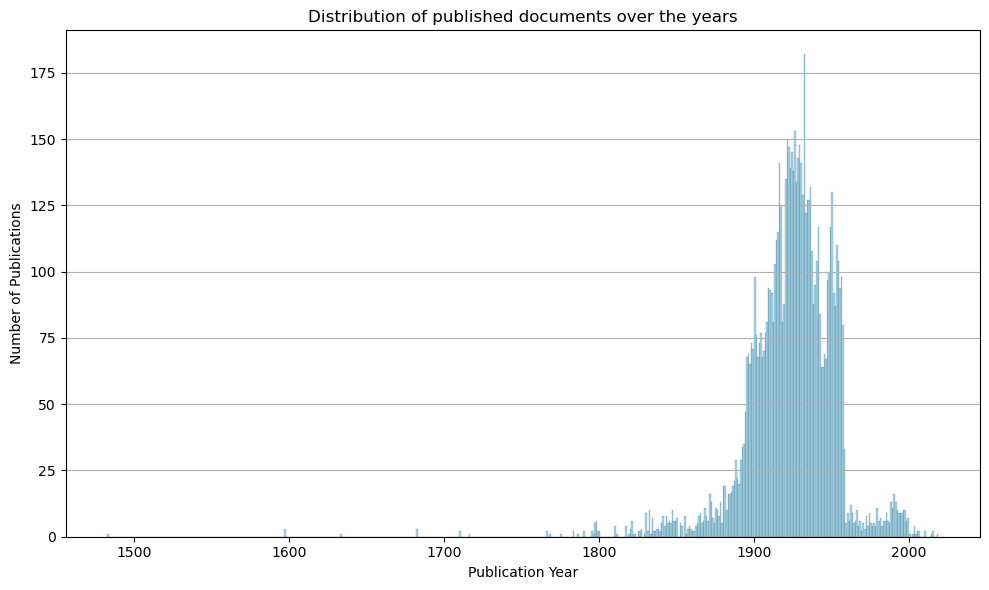

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with a 'PublicationDate' column
# Create a sample DataFrame for demonstration purposes


# Convert 'N/A' to NaN
df['PublicationDate'] = df['PublicationDate'].replace('N/A', np.nan)

# Drop rows with NaN in 'PublicationDate' column for histogram plotting
df_filtered = df.dropna(subset=['PublicationDate'])

# Extract only the years from the 'PublicationDate' column
df_filtered['PublicationYear'] = df_filtered['PublicationDate'].str.extract(r'(\d{4})')

# Convert the 'PublicationYear' column of the filtered dataframe to integer type
df_filtered['PublicationYear'] = df_filtered['PublicationYear'].astype(float)

# Plot the histogram with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='PublicationYear', bins=range(int(df_filtered['PublicationYear'].min()), int(df_filtered['PublicationYear'].max()) + 2), kde=False, color='skyblue')

plt.title('Distribution of published documents over the years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
